In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
iris = load_wine()

print(iris.data.shape)
A = iris.data
for i in range(A.shape[1]):
  A[:,i] = -1 + 2*((A[:,i]-min(A[:,i]))/(max(A[:,i])-min(A[:,i])))

print(iris.target.shape)

C = len(np.unique(iris.target))
print("Unique Classes: ", np.unique(iris.target))
print("Number of unique classes: ",C)

n = iris.data.shape[0]
d = iris.data.shape[1]

y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1

indexarr = np.arange(n)
np.random.seed(39)
np.random.shuffle(indexarr)

(178, 13)
(178,)
Unique Classes:  [0 1 2]
Number of unique classes:  3


In [ ]:
A

array([[ 0.68421053, -0.61660079,  0.14438503, ..., -0.08943089,
         0.94139194,  0.12268188],
       [ 0.14210526, -0.58893281, -0.1657754 , ..., -0.07317073,
         0.56043956,  0.10128388],
       [ 0.12105263, -0.35968379,  0.40106952, ..., -0.10569106,
         0.39194139,  0.29386591],
       ...,
       [ 0.17894737,  0.39920949, -0.03743316, ..., -0.82113821,
        -0.78754579, -0.20542083],
       [ 0.12631579, -0.2687747 ,  0.0802139 , ..., -0.80487805,
        -0.74358974, -0.19828816],
       [ 0.63157895,  0.32806324,  0.47593583, ..., -0.78861789,
        -0.75824176, -0.59771755]])

In [ ]:
train_data = []
train_label = []
test_data = []
test_label = []
counter = 1
for i in indexarr:
  if counter <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  counter = counter + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
def predict(w,x):
  a = np.matmul(w.T, x)
  if a > 0:
    return 1
  elif  a < 0:
    return -1
  else:
   return 0

#Q.2

The projection of a vector $z$ onto the set $C$ can be found by clipping the components of $z$ that are outside the range $[-1,1]$. This is because $C$ is defined as the set of vectors in $\mathbb{R}^d$ where each component is bounded between -1 and 1 .

Let $\operatorname{Proj}_C(z)$ denote the projection of $z$ onto $C$. Then, the expression for $\operatorname{Proj}_C(z)$ can be obtained by performing the following element-wise operation:
$$
\left(\operatorname{Proj}_C(z)\right)_i= \begin{cases}-1 & \text { if } z_i<-1 \\ z_i & \text { if }-1 \leq z_i \leq 1 \\ 1 & \text { if } z_i>1\end{cases}
$$
where $i=1,2, \ldots, d$.

In other words, for each component of $z$, if it is less than -1 , it is set to -1 ; if it lies within the range $[-1,1]$, it remains unchanged; and if it is greater than 1 , it is set to 1

#Q.3

The appropriate choice of $f_i(w)$ can be:


*   For Hinge Loss:



$$f_i(w)=\frac{λ}{2N}\mathbf{w^Tw} +\frac{1}{n}\text{max}\{0,1-y_i\mathbf{w^T}\mathbf{x}_i\}$$
*   For logistic loss:
$$f_i(w)=\frac{λ}{2N}\mathbf{w^Tw} +\frac{1}{n}\log(1+exp(-y_i\mathbf{w^T}\mathbf{x}_i))$$
* For Squared Hinge Loss:
$$f_i(w)=\frac{λ}{2N}\mathbf{w^Tw} +\frac{1}{n}(\text{max}\{0,1-y_i\mathbf{w^T}\mathbf{x}_i\})^2$$

**Where  $${N}$$  is the number of rows**




The (sub-)gradient for the loss function is denoted by $g_i(w) = ∇_wf_i(w)$

if $y_iw^Tx_i \geq 1$

then $g_i(w)=\frac{λ}{N}w$

and if $y_iw^Tx_i \leq 1$

then $g_i(w)=\frac{λ}{N}w - y_ix_i$


In [ ]:
def compute_accuracy(data,labels,model_w):
  cnt = 0
  n = len(labels)
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      cnt = cnt + 1
  return cnt/n

In [ ]:
def compute_loss_h(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w.T, x))))

def compute_loss_l(w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(w.T, x)))))

def compute_loss_sh(w,x,y):
  return (max(0, np.subtract(1, np.dot(y, np.dot(w.T, x)))))**2


In [ ]:
def compute_objfnval_h(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_h(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

def compute_objfnval_l(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_l(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

def compute_objfnval_sh(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_sh(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [ ]:
def compute_grad_loss_h(x,y,w,i):
  l = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/x.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/x.shape[0]
  return l

def compute_grad_loss_l(data, label,w ,i):
  return np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i]))))))/data.shape[0]


def compute_grad_loss_sh(x,y,w,i):
  l = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/x.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/x.shape[0]
  return l

#Q.4

In [ ]:
def compute_orthogonal_projection(z):
  length = len(z)
  minimum_x = np.ones(length)
  for i in range(length):
    if abs(z[i]) <= 1:
      minimum_x[i] = z[i]
    elif z[i] < -1:
      minimum_x[i] = -1
    else:
      minimum_x[i] = 1
  return minimum_x

#Q.5

In [ ]:
def OPT1_h(data, label, lamda, epochs):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  f_val_arr = []
  test_acc_arr = []
  train_acc_arr = []
  x = data
  for epoch in range(epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))))
      # print(w)
      t = t+1
      if t>1e4:
        t = 1
    f_val_arr.append(compute_objfnval_h(data,label,w))
    train_acc_arr.append(compute_accuracy(train_data, train_label, w))
    test_acc_arr.append(compute_accuracy(test_data, test_label, w))
  return w, f_val_arr, test_acc_arr, train_acc_arr

# **6. a)**

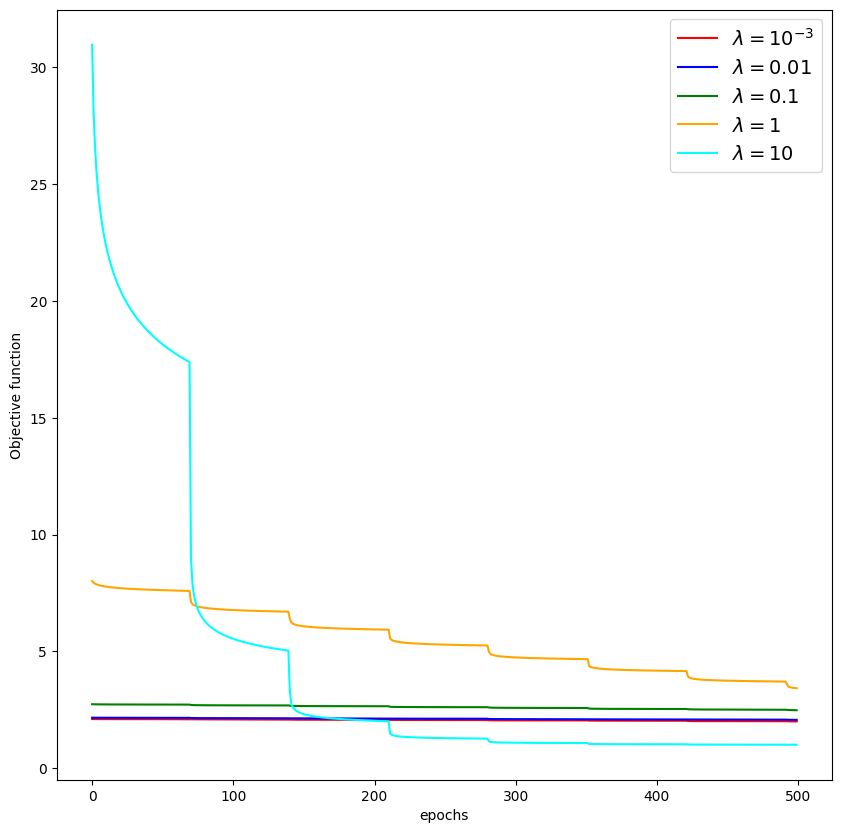

In [ ]:
num_epochs = 500
lambda_set = [10**(-3), 10**(-2),0.1, 1, 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize=(10,10))
for lamda in lambda_set:
  w, f_val, test_acc_arr, train_acc_arr = OPT1_h(train_data,train_label,lamda, num_epochs)
  plt.plot(list(range(num_epochs)),f_val,color = clr_lst[i])
  i = i+1
plt.xlabel('epochs')
plt.ylabel('Objective function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

# **6. b)**

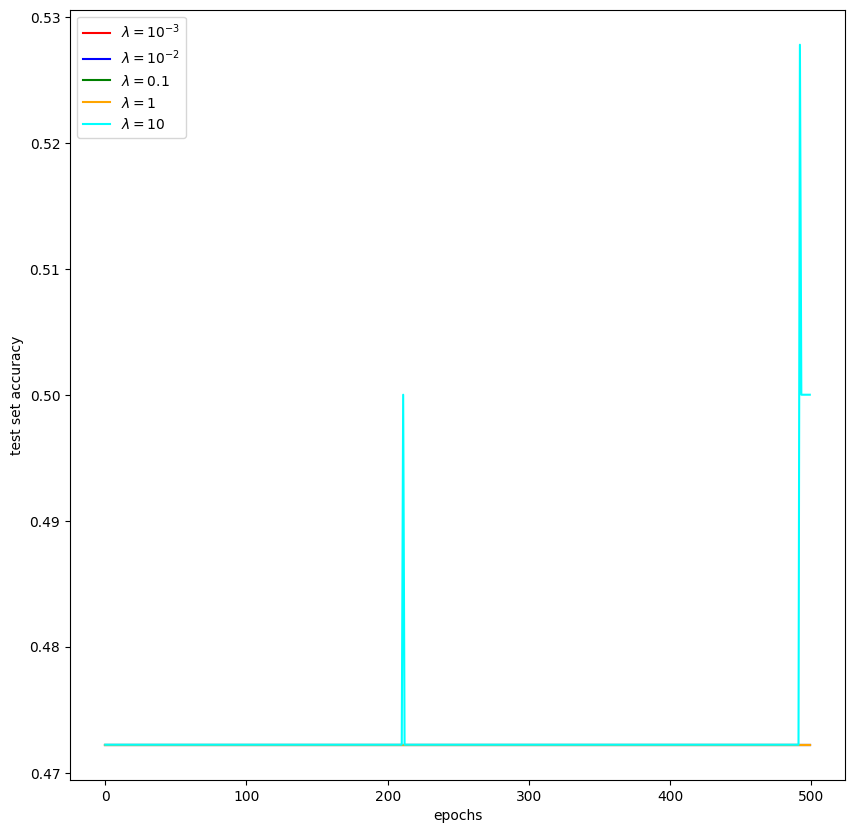

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_h(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),test_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("test set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

# **6. c)**

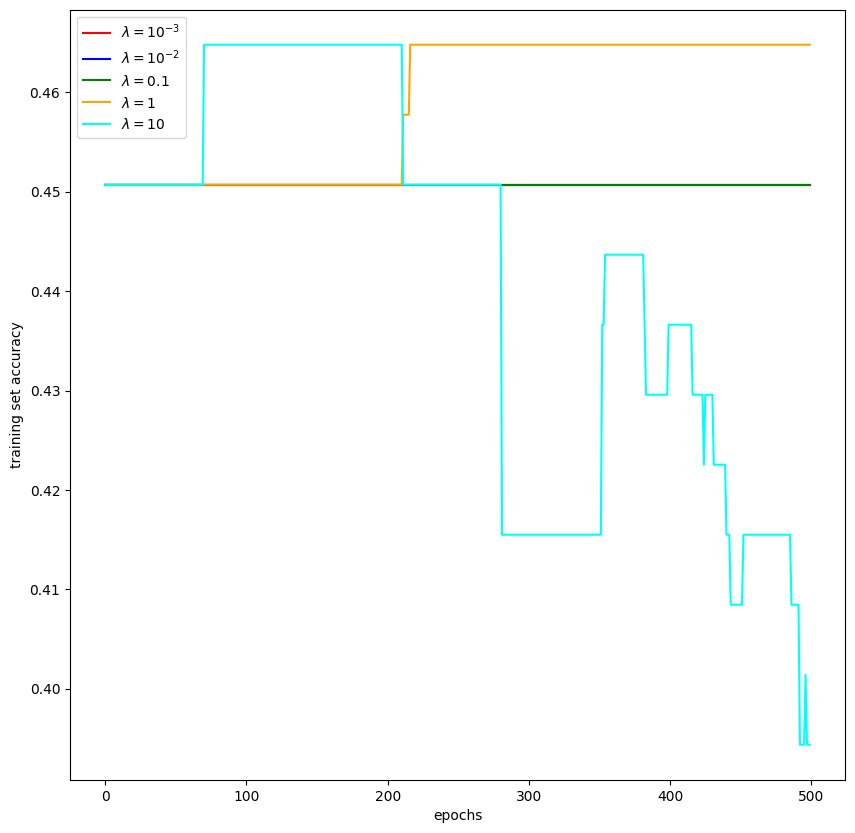

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_h(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),train_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("training set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

# **6. d)**

In [ ]:
from tabulate import tabulate
table = [["lamda" , "test set accuracy" , "train set accuracy"]]
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
i = 0
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_h(train_data , train_label , lamda , num_epochs)
  table.append([lamda , test_acc[-1] , train_acc[-1]])
  i = i+1
print(tabulate(table , headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═════════════════════╤══════════════════════╕
│   lamda │   test set accuracy │   train set accuracy │
╞═════════╪═════════════════════╪══════════════════════╡
│   0.001 │            0.472222 │             0.450704 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.01  │            0.472222 │             0.450704 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.1   │            0.472222 │             0.464789 │
├─────────┼─────────────────────┼──────────────────────┤
│   1     │            0.472222 │             0.464789 │
├─────────┼─────────────────────┼──────────────────────┤
│  10     │            0.416667 │             0.330986 │
╘═════════╧═════════════════════╧══════════════════════╛


# **6. e)**
**Observations:** We can see that with varying value of lambda test set accuracy (38.88 %) is not changing ,only it decreased for lamda = 10.
Similarly trainig set accuracy(48.59%) is also not varying with lamda, only it decreased for lamda = 10.

# **7) $ For  \ L_l$**

In [ ]:
def OPT1_l(data, label, lamda, epochs):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  f_val_arr = []
  test_acc_arr = []
  train_acc_arr = []
  x = data
  for epoch in range(epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    f_val_arr.append(compute_objfnval_l(data,label,w))
    train_acc_arr.append(compute_accuracy(train_data, train_label, w))
    test_acc_arr.append(compute_accuracy(test_data, test_label, w))


  return w, f_val_arr, test_acc_arr, train_acc_arr

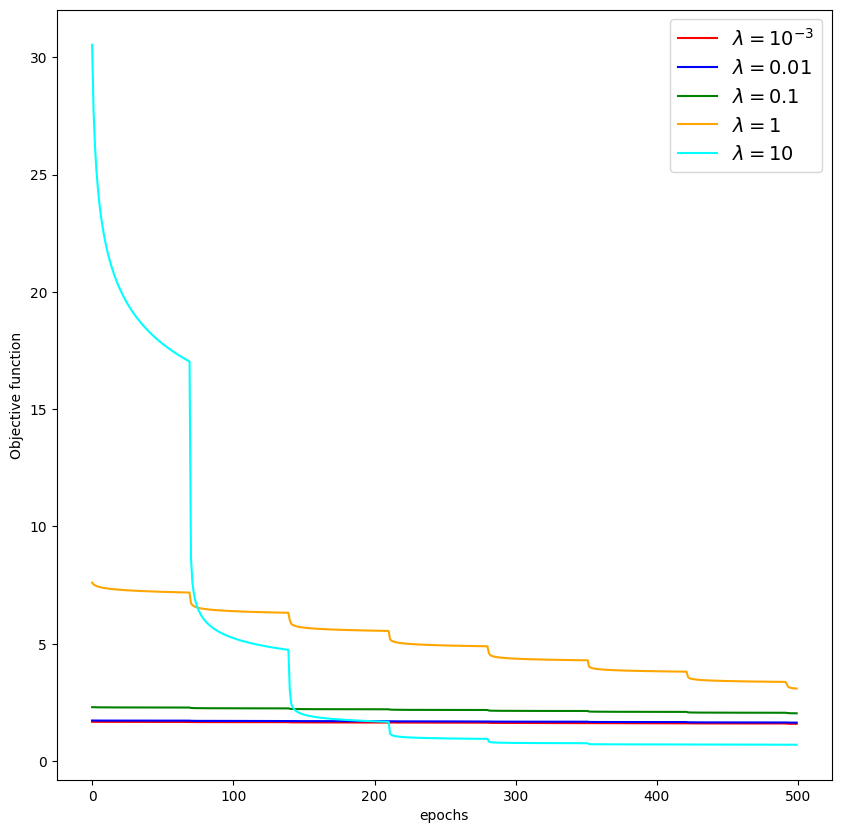

In [ ]:
num_epochs = 500
lambda_set = [10**(-3), 10**(-2),0.1, 1, 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize=(10,10))
for lamda in lambda_set:
  w, f_val, test_acc_arr, train_acc_arr = OPT1_l(train_data,train_label,lamda, num_epochs)
  plt.plot(list(range(num_epochs)),f_val,color = clr_lst[i])
  i = i+1
plt.xlabel('epochs')
plt.ylabel('Objective function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

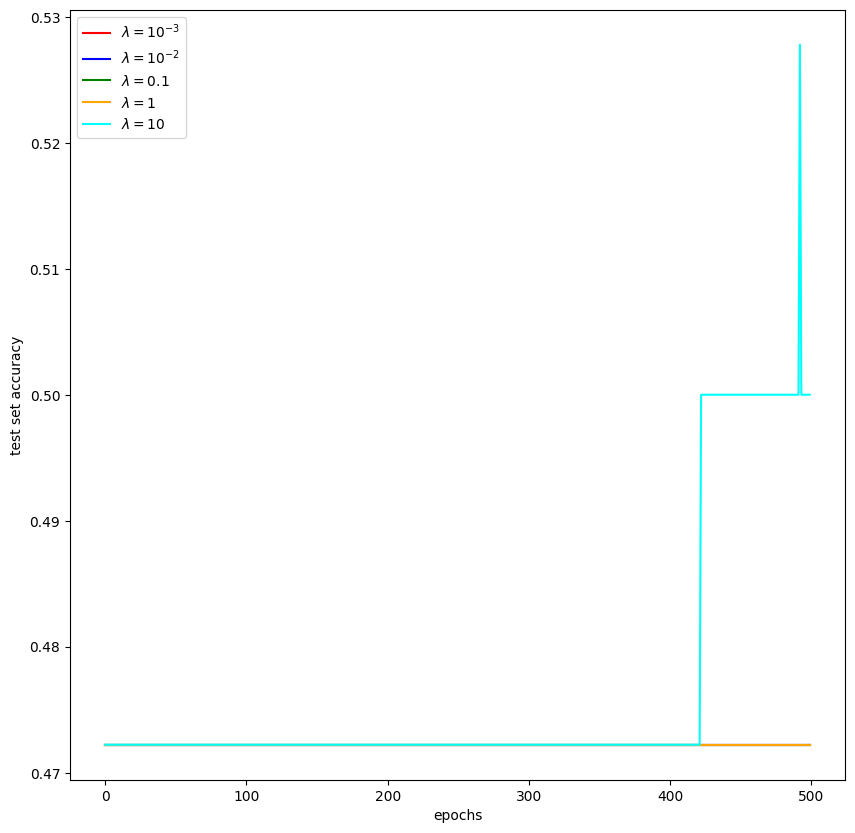

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_l(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),test_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("test set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

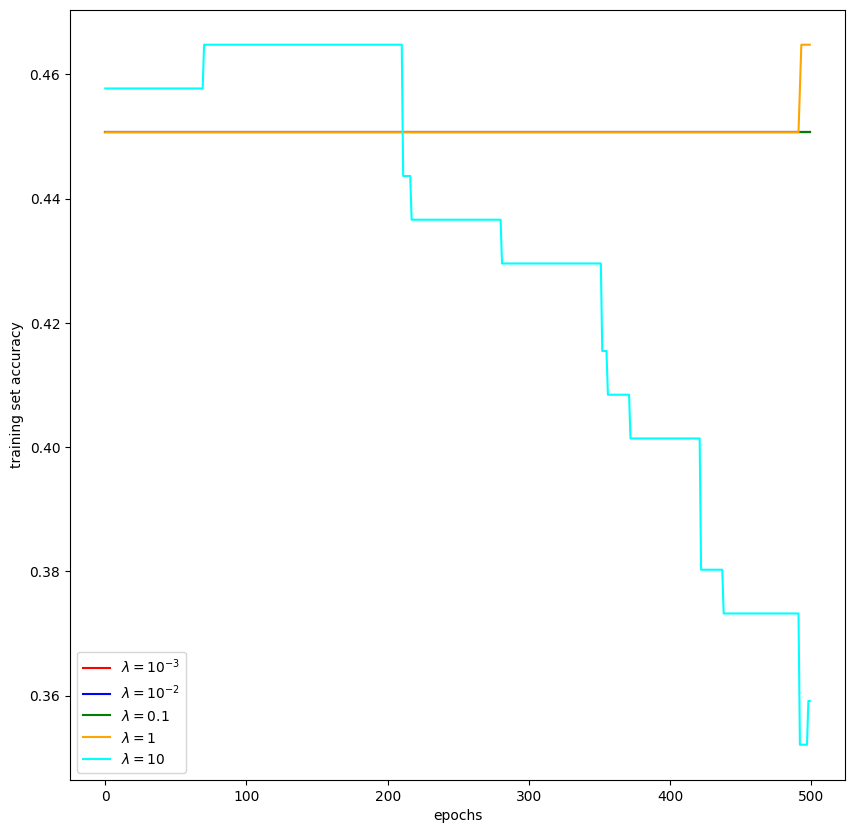

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_l(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),train_acc ,color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("training set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

In [ ]:
from tabulate import tabulate
table = [["lamda" , "test set accuracy" , "train set accuracy"]]
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
i = 0
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_l(train_data , train_label , lamda , num_epochs)
  table.append([lamda , test_acc[-1] , train_acc[-1]])
  i = i+1
print(tabulate(table , headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═════════════════════╤══════════════════════╕
│   lamda │   test set accuracy │   train set accuracy │
╞═════════╪═════════════════════╪══════════════════════╡
│   0.001 │            0.472222 │             0.450704 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.01  │            0.472222 │             0.450704 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.1   │            0.472222 │             0.464789 │
├─────────┼─────────────────────┼──────────────────────┤
│   1     │            0.472222 │             0.457746 │
├─────────┼─────────────────────┼──────────────────────┤
│  10     │            0.583333 │             0.56338  │
╘═════════╧═════════════════════╧══════════════════════╛


# **Observations:**
We can see that with varying value of lambda test set accuracy (38.88 %) is not changing ,only it decreased for lamda = 10.
Similarly trainig set accuracy is also almost same for each lamda , but increased for lamda = 10.

# **7) For $L_{sh}$**

In [ ]:
def OPT1_sh(data, label, lamda, epochs):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  f_val_arr = []
  test_acc_arr = []
  train_acc_arr = []
  x = data
  for epoch in range(epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    f_val_arr.append(compute_objfnval_sh(data,label,w))
    train_acc_arr.append(compute_accuracy(train_data, train_label, w))
    test_acc_arr.append(compute_accuracy(test_data, test_label, w))


  return w, f_val_arr, test_acc_arr, train_acc_arr

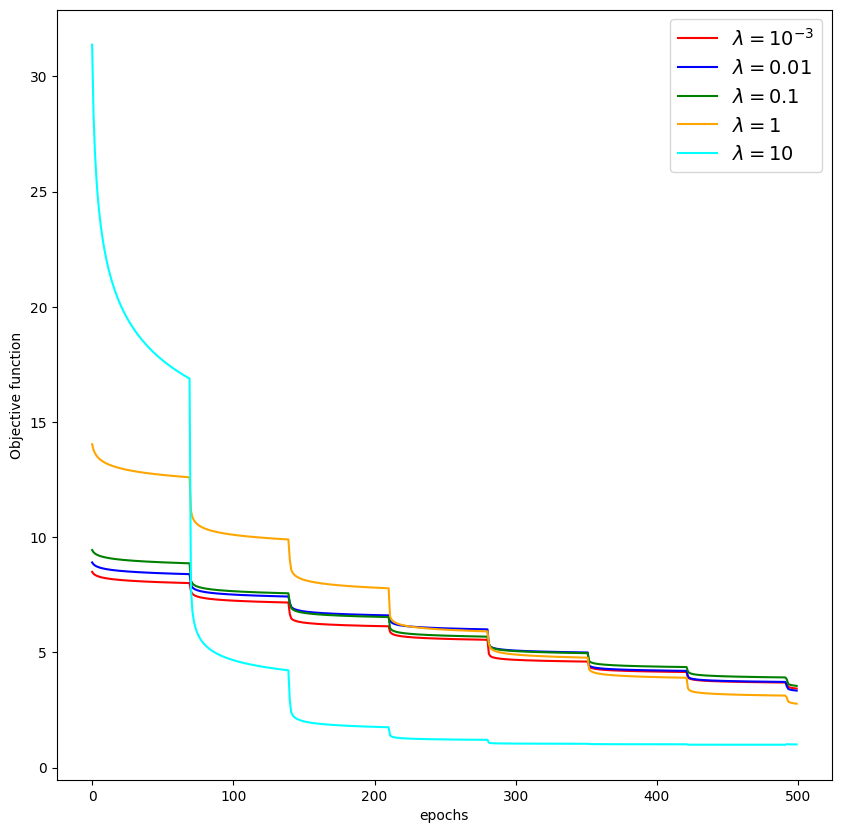

In [ ]:
num_epochs = 500
lambda_set = [10**(-3), 10**(-2),0.1, 1, 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize=(10,10))
for lamda in lambda_set:
  w, f_val, test_acc_arr, train_acc_arr = OPT1_sh(train_data,train_label,lamda, num_epochs)
  plt.plot(list(range(num_epochs)),f_val,color = clr_lst[i])
  i = i+1
plt.xlabel('epochs')
plt.ylabel('Objective function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

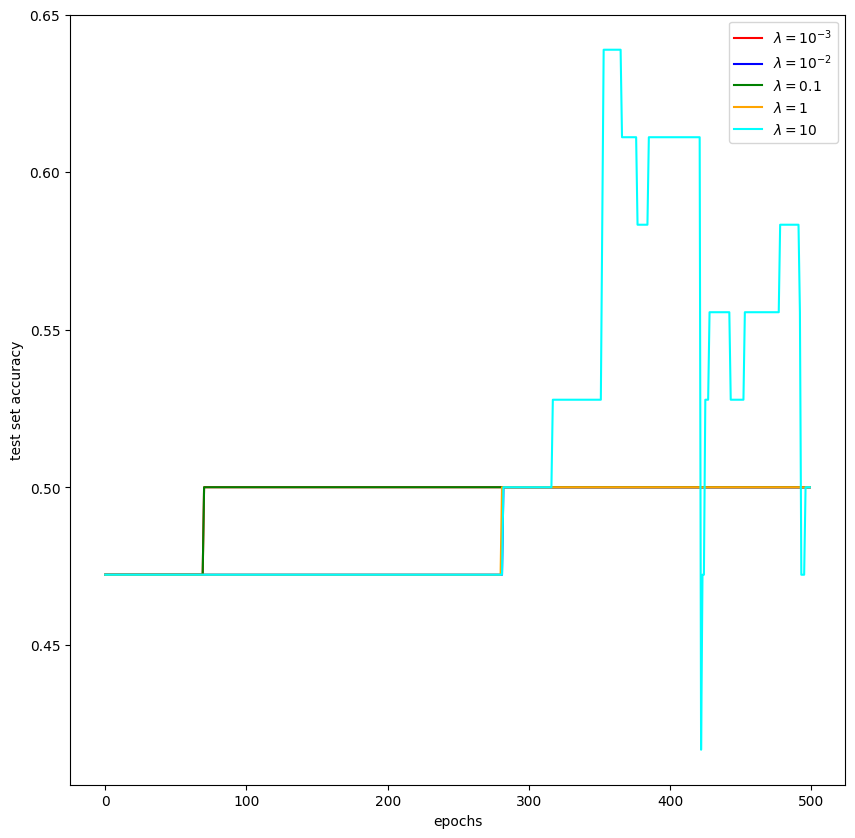

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sh(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),test_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("test set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

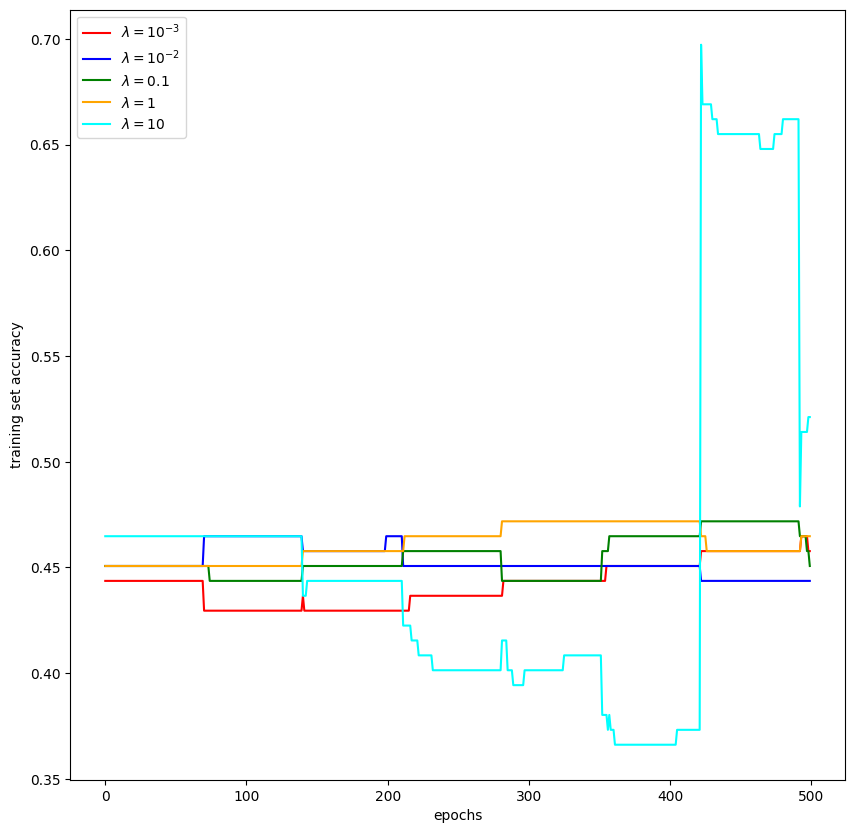

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sh(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),train_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("training set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

In [ ]:
from tabulate import tabulate
table = [["lamda" , "test set accuracy" , "train set accuracy"]]
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
i = 0
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sh(train_data , train_label , lamda , num_epochs)
  table.append([lamda , test_acc[-1] , train_acc[-1]])
  i = i+1
print(tabulate(table , headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═════════════════════╤══════════════════════╕
│   lamda │   test set accuracy │   train set accuracy │
╞═════════╪═════════════════════╪══════════════════════╡
│   0.001 │                 0.5 │             0.492958 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.01  │                 0.5 │             0.457746 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.1   │                 0.5 │             0.478873 │
├─────────┼─────────────────────┼──────────────────────┤
│   1     │                 0.5 │             0.464789 │
├─────────┼─────────────────────┼──────────────────────┤
│  10     │                 0.5 │             0.366197 │
╘═════════╧═════════════════════╧══════════════════════╛


 **Observations:**
 We can see that with varying value of lambda test set accuracy is almost same,only it decreased too much  for lamda = 10.
Similarly trainig set accuracy is also almost same for each lamda , but decreased from lamda = 1 to 10..

From all the three functions accuracy we can conclude that squared hinge loss function has given better accuracy as compared to other two loss functions.